### Загрузка данных и пакетов

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
print(df.shape)
df.head()

(41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [2]:
df['Sentiment'] = df['Sentiment'].replace('Extremely Negative', 'Negative')
df['Sentiment'] = df['Sentiment'].replace('Extremely Positive', 'Positive')

### Вывод случайных значений и обзор датафрейма

In [3]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3322,7121,52073,"Oklahoma, USA",18-03-2020,Everyone keeps encouraging my mother to stock ...,Negative
38330,42129,87081,"Pune, India",11-04-2020,Using pH 2.7 #Booster Water as a Hand sanitize...,Positive
4726,8525,53477,NaN,18-03-2020,eMarketer: COVID-19's business and consumer im...,Neutral
9179,12978,57930,"London, England",20-03-2020,"Fuck it, may as well prepare for the inevitabl...",Neutral
10825,14624,59576,NaN,20-03-2020,#Covid_19 #CashAppFriday\r\r\nOnline shopping ...,Positive
29647,33446,78398,"British Columbia, Canada",05-04-2020,@MorkCrispy Did I miss something? Did covid 1...,Negative
14857,18656,63608,"Croydon, London",22-03-2020,A fake hand sanitizer manufacturing unit was b...,Negative
5254,9053,54005,USA; presently in MD/DC Metro,18-03-2020,DC grocery store hours coronavirus COVID-19 | ...,Neutral
2490,6289,51241,"San Antonio, TX",17-03-2020,This morning at HEB (Texas grocery store) was ...,Negative
6678,10477,55429,United States,19-03-2020,Love articles like these. Keep reporting on po...,Positive


In [4]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df[['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


### Визуализация

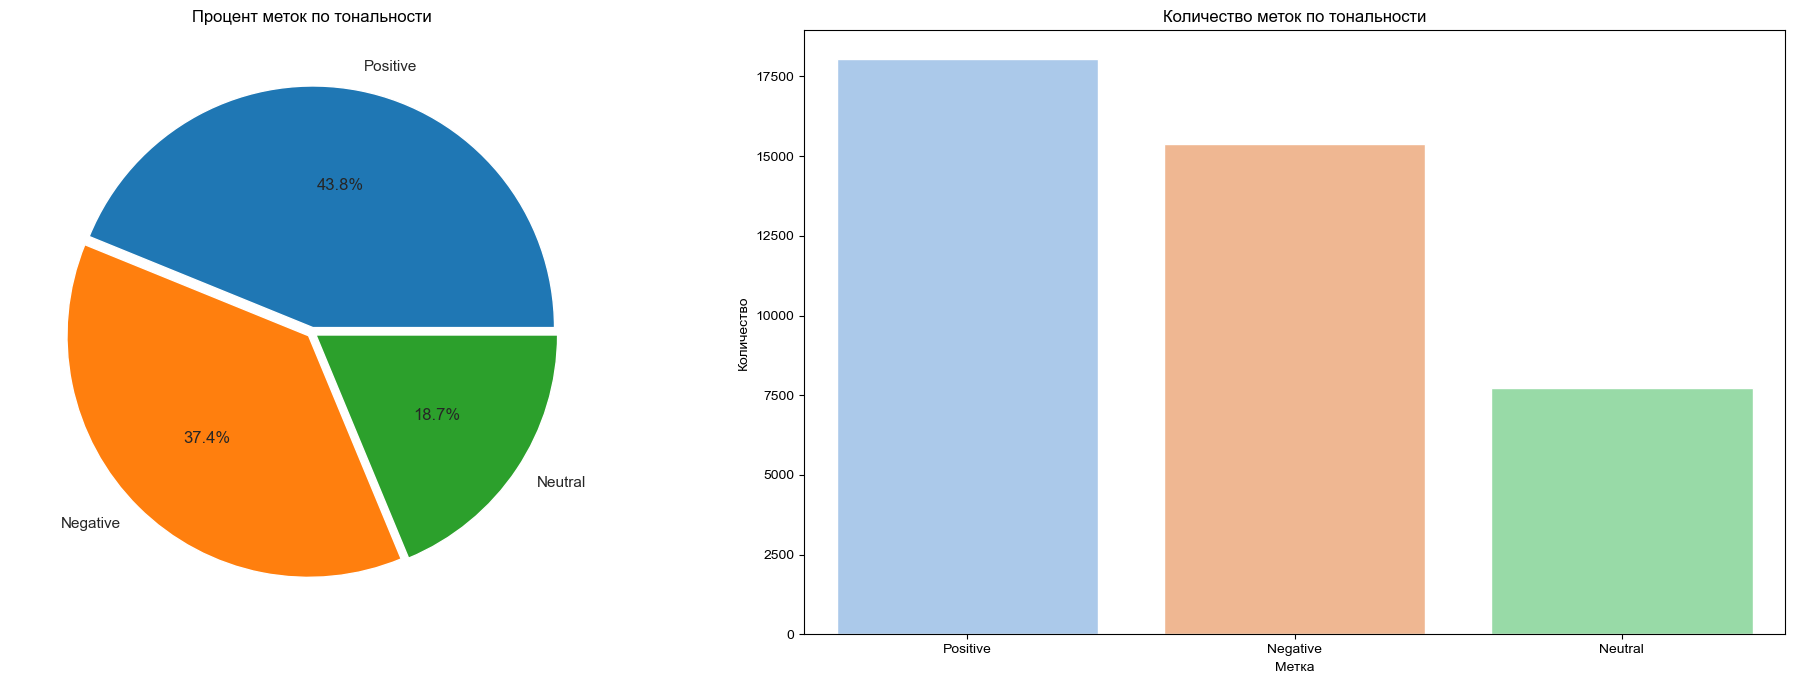

In [7]:
label_count = df['Sentiment'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,7))
sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', explode = explode)
axes[0].set_title('Процент меток по тональности')

sns.barplot(x=label_count.index, y=label_count.values)
axes[1].set_title('Количество меток по тональности')
axes[1].set_xlabel('Метка')
axes[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()



### Подсчет длины сообщений

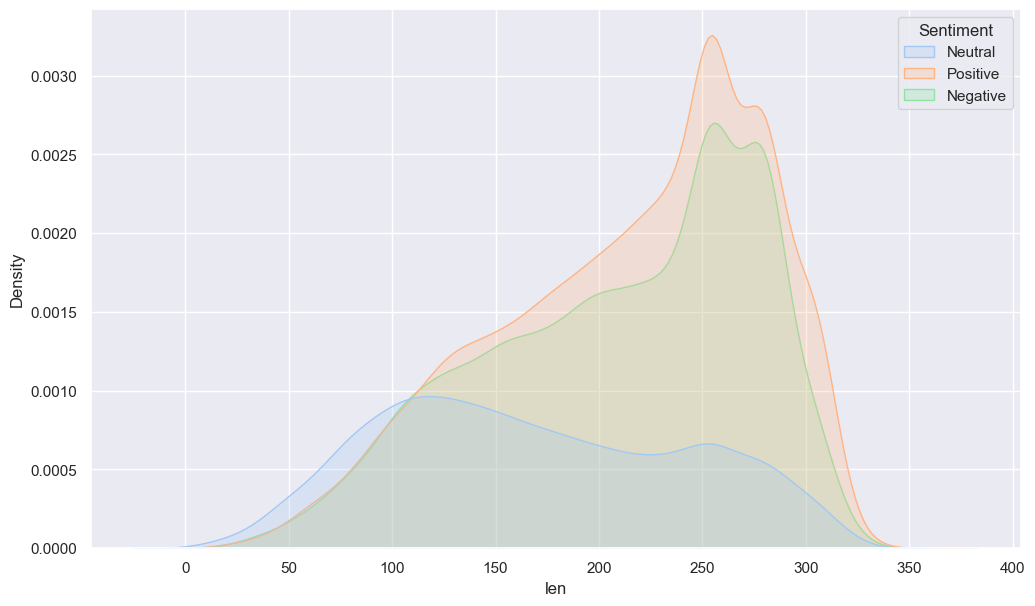

In [8]:
df['len'] = df['OriginalTweet'].apply(len)

plt.figure(figsize=(12,7))
sns.kdeplot(df, x='len', fill=True, hue='Sentiment')
plt.show()

### CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(df['OriginalTweet'])

In [10]:
matrix

<41157x80424 sparse matrix of type '<class 'numpy.int64'>'
	with 1149620 stored elements in Compressed Sparse Row format>

In [11]:
matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

In [12]:
cv.get_feature_names_out()[25310:25320]

array(['ep', 'ep0ws8fguo', 'ep25btol6q', 'ep33gkxghh', 'ep5lj48hpa',
       'ep5xojpxzq', 'ep7lw4vavp', 'ep8hpfe8bv', 'epa', 'epadievrxt'],
      dtype=object)

In [13]:
word_matrix = pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names_out())

In [14]:
word_matrix

,00,000,0000,0000009375,0000hrs,000162,00042,000cr,000francs,000ksh,...,zzxwzxhc2v,zzz,zzzz,zâ,zã,zã¼rich,â²,ã¼berweist,ã¼cretsiz,ã¼retime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Часто встречающиеся слова

In [15]:
df_sum =word_matrix.sum(axis=0, skipna=True)
bow = df_sum.sort_values(ascending=False)[:30]
bow = pd.DataFrame(bow, columns=['Frequncy'])

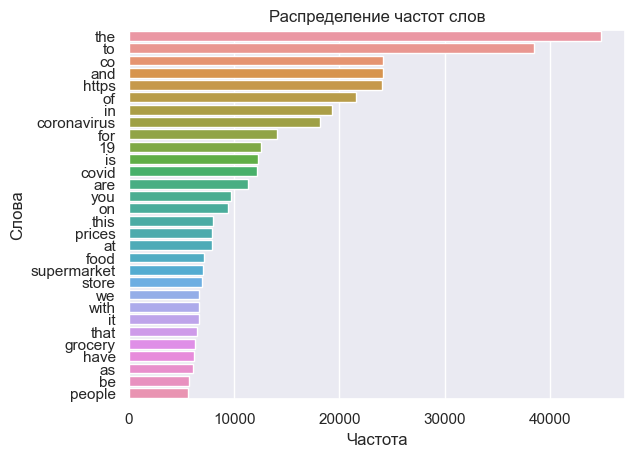

In [16]:
sns.barplot(x=bow['Frequncy'], y = bow.index)
plt.xlabel('Частота')
plt.ylabel('Слова')
plt.title('Распределение частот слов')
plt.show()

### Очистка данных

In [17]:
import string
import nltk
import re
nltk.download('punkt')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"^a-z'A-Z", ' ', text)
    text = re.sub(r"\s+ [a-z'A-Z]\s+", ' ', text+ ' ')
    text = ''.join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = ' '.join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub('\s[\s]+', ' ', text).strip()
    return text


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/artemgolubnichiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
df['new_text'] = df['OriginalTweet'].apply(clean_text)
df.head()

,OriginalTweet,Sentiment,len,new_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,306,food stock one empty please dont panic enough ...
4,"Me, ready to go at supermarket during the #COV...",Negative,310,ready supermarket covid19 outbreak paranoid fo...


In [19]:
df['Sentiment'].iloc[567]

'Positive'

In [20]:
df['OriginalTweet'].iloc[567]

"If there's an elderly person/couple that cant make it to the grocery store or simply doesn't want to go, I'd be happy to go for you.\r\r\n\r\r\nIf you know someone in need in or around Lewisville/Frisco please DM me and well try to figure this out.\r\r\n\r\r\n#coronavirus"

### Стемминг

In [21]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
words = word_tokenize(df['new_text'].iloc[1])
for w in words:
    print(w, ':', ps.stem(w))

advice : advic
talk : talk
neighbours : neighbour
family : famili
exchange : exchang
phone : phone
numbers : number
create : creat
contact : contact
list : list
phone : phone
numbers : number
neighbours : neighbour
schools : school
employer : employ
chemist : chemist
set : set
online : onlin
shopping : shop
accounts : account
poss : poss
adequate : adequ
supplies : suppli
regular : regular
meds : med
order : order


In [22]:
stemmed = []
for i in range(len(df)):
    stem_list = []
    words = word_tokenize(df['new_text'].iloc[i])
    for w in words:
        stem_list.append(ps.stem(w))
    stemmed.append(stem_list)

df['Stemmed'] = stemmed

In [23]:
df

,OriginalTweet,Sentiment,len,new_text,Stemmed
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,,[]
1,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbours family exchange phone n...,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworths give elderly ...,"[coronaviru, australia, woolworth, give, elder..."
3,My food stock is not the only one which is emp...,Positive,306,food stock one empty please dont panic enough ...,"[food, stock, one, empti, pleas, dont, panic, ..."
4,"Me, ready to go at supermarket during the #COV...",Negative,310,ready supermarket covid19 outbreak paranoid fo...,"[readi, supermarket, covid19, outbreak, parano..."
...,...,...,...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral,102,airline pilots offering stock supermarket shel...,"[airlin, pilot, offer, stock, supermarket, she..."
41153,Response to complaint not provided citing COVI...,Negative,138,response complaint provided citing covid19 rel...,"[respons, complaint, provid, cite, covid19, re..."
41154,You know itÂs getting tough when @KameronWild...,Positive,136,know itâs getting tough rationing toilet pape...,"[know, itâ, get, tough, ration, toilet, paper..."
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,111,wrong smell hand sanitizer starting turn coron...,"[wrong, smell, hand, sanit, start, turn, coron..."


In [24]:
df['Stemmed'] = df['Stemmed'].apply(' '.join)
df.sample(10)

,OriginalTweet,Sentiment,len,new_text,Stemmed
23103,The great toilet-paper panic https://t.co/zFqV...,Positive,189,great toiletpaper panic via toiletpaper panick...,great toiletpap panic via toiletpap panickbuy ...
33663,Normal people online shopping after a glass or...,Positive,285,normal people online shopping glass two wine i...,normal peopl onlin shop glass two wine ill pai...
39273,Something is wrong here. My local grocery sto...,Negative,190,something wrong local grocery store hard time ...,someth wrong local groceri store hard time kee...
23179,Our Government?? should provide free electrici...,Positive,211,government provide free electricity taxes prod...,govern provid free electr tax product reduc pr...
34147,Mobile applications and mobility data have eno...,Positive,236,mobile applications mobility data enormous pot...,mobil applic mobil data enorm potenti help und...
30468,"putting your prices up during this crisis, may...",Negative,103,putting prices crisis may come back bite loyal...,put price crisi may come back bite loyalti cor...
9488,Convenience Stores &amp; Grocery #CEOs of a e...,Neutral,306,convenience stores amp grocery ceos essential ...,conveni store amp groceri ceo essenti retail r...
10078,To the woman looking over my shoulder in the s...,Positive,229,woman looking shoulder supermarket took theres...,woman look shoulder supermarket took there ple...
28384,@waitrose Your #Greenwich #waitrose store was ...,Negative,255,greenwich waitrose store absolutely awful toda...,greenwich waitros store absolut aw today zero ...
26256,@rajivbc @PMOIndia @CPMumbaiPolice @AmitShah @...,Neutral,255,maharashtra govt show guts ban mnfrg amp distr...,maharashtra govt show gut ban mnfrg amp distrb...


### Классификация

#### Наивный Байес

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X = df['Stemmed']
y, class_names = pd.factorize(df['Sentiment'], sort=True)

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)


In [26]:
pipe_1 = Pipeline([('vectorizer', TfidfVectorizer()), ('classifire', MultinomialNB(alpha=0.005))])

pipe_1.fit(X_train, y_train)

y_pred = pipe_1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

0.6358114674441205
              precision    recall  f1-score   support

    Negative       0.64      0.68      0.66      3080
     Neutral       0.61      0.24      0.34      1543
    Positive       0.63      0.77      0.69      3609

    accuracy                           0.64      8232
   macro avg       0.63      0.56      0.57      8232
weighted avg       0.63      0.64      0.62      8232



#### Логистическая регрессия

In [27]:
from sklearn.linear_model import LogisticRegression
pipe_2 = Pipeline([('vectorizer', TfidfVectorizer()), ('classifire', LogisticRegression())])

pipe_2.fit(X_train, y_train)

y_pred = pipe_2.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

0.7881438289601554
              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80      3080
     Neutral       0.74      0.61      0.67      1543
    Positive       0.80      0.85      0.82      3609

    accuracy                           0.79      8232
   macro avg       0.78      0.76      0.76      8232
weighted avg       0.79      0.79      0.79      8232



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
